In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
data = 'Datasets/Air and Sea Travel Statistics/ASA01.csv'

df = pd.read_csv(data)
df

,STATISTIC Label,Year,Direction,Mode,UNIT,VALUE
0,Air and Sea Travel,2010,Arrivals,All modes of transport,Thousand,12902.2
1,Air and Sea Travel,2010,Arrivals,Air,Thousand,11400.6
2,Air and Sea Travel,2010,Arrivals,Sea,Thousand,1501.7
3,Air and Sea Travel,2010,Departures,All modes of transport,Thousand,12920.2
4,Air and Sea Travel,2010,Departures,Air,Thousand,11425.3
...,...,...,...,...,...,...
79,Air and Sea Travel,2023,Arrivals,Air,Thousand,19481.0
80,Air and Sea Travel,2023,Arrivals,Sea,Thousand,1144.6
81,Air and Sea Travel,2023,Departures,All modes of transport,Thousand,20626.2
82,Air and Sea Travel,2023,Departures,Air,Thousand,19476.1


What Is Discrete Data vs. Continuous Data? 

What is discrete data?
Discrete data is a type of quantitative data that includes nondivisible figures and statistics you can count.

You typically write discrete data points as numbers that represent exact values.

You can often describe discrete data by using the phrase "the number of," such as the number of customers in a store.


Discrete data usually represents single events that have already occurred. 

When reviewing discrete data, you can analyze exact figures like units sold on a specific day or the hours an employee worked during a certain week.

What is continuous data?

Continuous data is a type of quantitative data that represents precise measurements of nearly any numeric value. 

Often, a continuous data variable has many decimal points because it's an exact measurement between two defined points.

Measuring this type of data is common in industries requiring specific data, such as health care, manufacturing and research and development. 

Continuous data may change over time, allowing businesses to analyze their operations and predict future trends. 

For example, a business may track the amount of time it takes a team to complete projects.

In [32]:
# Renaming columns
df_renamed = df.replace({
    'All modes of transport': 'Total',
    'Arrivals Total': 'Arrivals Total',
    'Departures Total': 'Departures Total'
})

# Applying pivot_table function on dataframe to put 'VALUE' into new labeled columns [DIRECTION]+[Mode]'
df_pivoted = df_renamed.pivot_table(index='Year', columns=['Direction', 'Mode'], values='VALUE')

# Rename columns joining Direction with Mode names and sorting in alphabetical order
df_pivoted.columns = [' '.join(col).strip() for col in df_pivoted.columns.values]
df_pivoted = df_pivoted.reindex(sorted(df_pivoted.columns), axis=1)

# Reset index to make 'Year' a column and not an index label
df_pivoted.reset_index(inplace=True)

# Show the DataFrame
df_pivoted


,Year,Arrivals Air,Arrivals Sea,Arrivals Total,Departures Air,Departures Sea,Departures Total
0,2010,11400.6,1501.7,12902.2,11425.3,1494.9,12920.2
1,2011,11647.5,1402.2,13049.7,11707.1,1402.5,13109.7
2,2012,11806.7,1335.3,13142.0,11839.7,1321.9,13161.6
3,2013,12287.7,1345.2,13632.9,12314.5,1340.7,13655.2
4,2014,13138.8,1408.0,14546.8,13169.5,1401.0,14570.5
5,2015,14744.6,1355.6,16100.3,14790.4,1348.1,16138.5
6,2016,16232.4,1300.2,17532.6,16318.9,1289.2,17608.1
7,2017,17076.0,1323.3,18399.4,17139.8,1309.0,18448.8
8,2018,18102.2,1293.7,19395.9,18180.6,1275.7,19456.3
9,2019,18907.5,1236.2,20143.7,18975.1,1230.3,20205.3


In [33]:
df_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              14 non-null     int64  
 1   Arrivals Air      14 non-null     float64
 2   Arrivals Sea      14 non-null     float64
 3   Arrivals Total    14 non-null     float64
 4   Departures Air    14 non-null     float64
 5   Departures Sea    14 non-null     float64
 6   Departures Total  14 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 912.0 bytes


What are Descriptive Statistics?
Descriptive statistics summarize certain aspects of a data set or a population using numeric calculations. Examples of descriptive statistics include:

mean, average
midrange
standard deviation
quartiles
This calculator generates descriptive statistics for a data set. Enter data values separated by commas or spaces. You can also copy and paste data from spreadsheets or text documents. See allowable data formats in the table below.

Descriptive Statistics Formulas and Calculations
This calculator uses the formulas and methods below to find the statistical values listed.

Minimum
Ordering a data set x1 ≤ x2 ≤ x3 ≤ ... ≤ xn from lowest to highest value, the minimum is the smallest value x1.

Min=𝑥1=min(𝑥𝑖)𝑛𝑖=1
Maximum
Ordering a data set x1 ≤ x2 ≤ x3 ≤ ... ≤ xn from lowest to highest value, the maximum is the largest value xn.

Max=𝑥𝑛=max(𝑥𝑖)𝑛𝑖=1
Range
The range of a data set is the difference between the minimum and maximum.

Range=𝑥𝑛−𝑥1
Sum
The sum is the total of all data values x1 + x2 + x3 + ... + xn

Sum=∑𝑖=1𝑛𝑥𝑖
Size, Count
Size or count is the number of data points in a data set.

Size=𝑛=count(𝑥𝑖)𝑛𝑖=1
Mean
The mean of a data set is the sum of all of the data divided by the size. The mean is also known as the average.

For a Population

𝜇=∑𝑛𝑖=1𝑥𝑖𝑛
For a Sample

𝑥⎯⎯⎯=∑𝑛𝑖=1𝑥𝑖𝑛
Median
Ordering a data set x1 ≤ x2 ≤ x3 ≤ ... ≤ xn from lowest to highest value, the median is the numeric value separating the upper half of the ordered sample data from the lower half. If n is odd the median is the center value. If n is even the median is the average of the 2 center values.

If n is odd the median is the value at position p where

𝑝=𝑛+12
𝑥˜=𝑥𝑝
If n is even the median is the average of the values at positions p and p + 1 where

𝑝=𝑛2
𝑥˜=𝑥𝑝+𝑥𝑝+12
Mode
The mode is the value or values that occur most frequently in the data set. A data set can have more than one mode, and it can also have no mode.

Standard Deviation
Standard deviation is a measure of dispersion of data values from the mean. The formula for standard deviation is the square root of the sum of squared differences from the mean divided by the size of the data set.

For a Population

𝜎=∑𝑛𝑖=1(𝑥𝑖−𝜇)2𝑛‾‾‾‾‾‾‾‾‾‾‾‾‾‾√
For a Sample

𝑠=∑𝑛𝑖=1(𝑥𝑖−𝑥⎯⎯⎯)2𝑛−1‾‾‾‾‾‾‾‾‾‾‾‾‾‾√
Variance
Variance measures dispersion of data from the mean. The formula for variance is the sum of squared differences from the mean divided by the size of the data set.

For a Population

𝜎2=∑𝑛𝑖=1(𝑥𝑖−𝜇)2𝑛
For a Sample

𝑠2=∑𝑛𝑖=1(𝑥𝑖−𝑥⎯⎯⎯)2𝑛−1
Midrange
The midrange of a data set is the average of the minimum and maximum values.

MR=𝑥𝑚𝑖𝑛+𝑥𝑚𝑎𝑥2
Quartiles
Quartiles separate a data set into four sections. The median is the second quartile Q2. It divides the ordered data set into higher and lower halves.  The first quartile, Q1, is the median of the lower half not including Q2. The third quartile, Q3, is the median of the higher half not including Q2. This is one of several methods for calculating quartiles.[1]

Interquartile Range
The range from Q1 to Q3 is the interquartile range (IQR).

𝐼𝑄𝑅=𝑄3−𝑄1
Outliers
Potential outliers are values that lie above the Upper Fence or below the Lower Fence of the sample set.

Upper Fence=𝑄3+1.5×𝐼𝑄𝑅
Lower Fence=𝑄1−1.5×𝐼𝑄𝑅
Sum of Squares
The sum of squares is the sum of the squared differences between data values and the mean.

For a Population

𝑆𝑆=∑𝑖=1𝑛(𝑥𝑖−𝜇)2
For a Sample

𝑆𝑆=∑𝑖=1𝑛(𝑥𝑖−𝑥⎯⎯⎯)2
Mean Absolute Deviation
Mean absolute deviation[2] is the sum of the absolute value of the differences between data values and the mean, divided by the sample size.

For a Population

𝑀𝐴𝐷=∑𝑛𝑖=1|𝑥𝑖−𝜇|𝑛
For a Sample

𝑀𝐴𝐷=∑𝑛𝑖=1|𝑥𝑖−𝑥⎯⎯⎯|𝑛
Root Mean Square
The root mean square describes the magnitude of a set of numbers. The formula for root mean square is the square root of the sum of the squared data values divided by n.

𝑅𝑀𝑆=∑𝑛𝑖=1𝑥2𝑖𝑛‾‾‾‾‾‾‾‾√
Standard Error of the Mean
Standard error of the mean is calculated as the standard deviation divided by the square root of the count n.

For a Population

𝑆𝐸𝜇=𝜎𝑛√
For a Sample

𝑆𝐸𝑥⎯⎯⎯⎯=𝑠𝑛√
Skewness
Skewness[3] describes how far to the left or right a data set distribution is distorted from a symmetrical bell curve. A distribution with a long left tail is left-skewed, or negatively-skewed. A distribution with a long right tail is right-skewed, or positively-skewed.

For a Population

𝛾1=∑𝑛𝑖=1(𝑥𝑖−𝜇)3𝑛𝜎3
For a Sample

𝛾1=𝑛(𝑛−1)(𝑛−2)∑𝑖=1𝑛(𝑥𝑖−𝑥⎯⎯⎯𝑠)3
Kurtosis
Kurtosis[3] describes the extremeness of the tails of a population distribution and is an indicator of data outliers. High kurtosis means that a data set has tail data that is more extreme than a normal distribution. Low kurtosis means the tail data is less extreme than a normal distribution.

For a Population

𝛽2=∑𝑛𝑖=1(𝑥𝑖−𝜇)4𝑛𝜎4
For a Sample

𝛽2=𝑛(𝑛+1)(𝑛−1)(𝑛−2)(𝑛−3)∑𝑖=1𝑛(𝑥𝑖−𝑥⎯⎯⎯𝑠)4
Kurtosis Excess
Excess kurtosis describes the height of the tails of a distribution rather than the extremity of the length of the tails. Excess kurtosis means that the distribution has a high frequency of data outliers.

For a Population

𝛼4=∑𝑛𝑖=1(𝑥𝑖−𝜇)4𝑛𝜎4−3
For a Sample (This is just Kurtosis in MS Excel and Google Sheets)

𝛼4=𝑛(𝑛+1)(𝑛−1)(𝑛−2)(𝑛−3)∑𝑖=1𝑛(𝑥𝑖−𝑥⎯⎯⎯𝑠)4−3(𝑛−1)2(𝑛−2)(𝑛−3)
Coefficient of Variation
The coefficient of variation describes dispersion of data around the mean. It is the ratio of the standard deviation to the mean. The coefficient of variation is calculated as the standard deviation divided by the mean.

For a Population

𝐶𝑉=𝜎𝜇
For a Sample

𝐶𝑉=𝑠𝑥⎯⎯⎯
Relative Standard Deviation
Relative standard deviation describes the variance of a subset of data from the mean. It is expressed as a percentage. Relative standard deviation is calculated as the standard deviation times 100 divided by the mean.

For a Population

𝑅𝑆𝐷=[100×𝜎𝜇]%
For a Sample

𝑅𝑆𝐷=[100×𝑠𝑥⎯⎯⎯]%
Frequency
Frequency is the number of occurrences for each data value in the data set. Frequency is used to find the mode of a data set.

In [34]:
#Calculate Max Value for each column
max_df = df_pivoted.max().drop(['Year'])

print("\nMax value for each column:")
max_df


Max value for each column:


Arrivals Air        19481.0
Arrivals Sea         1501.7
Arrivals Total      20625.6
Departures Air      19476.1
Departures Sea       1494.9
Departures Total    20626.2
dtype: float64

In [35]:
#Calculate Min Value for each column
min_df = df_pivoted.min().drop(['Year'])

print("\nMin value for each column:")
min_df

#print('Standard deviation of', iris_df[['sepallength']].std())

#print('Summary Statistics of', iris_df[['sepallength']].describe())

#print('Summary Statistics: All')
#iris_df.describe()


Min value for each column:


Arrivals Air        4135.7
Arrivals Sea         324.5
Arrivals Total      4460.2
Departures Air      4114.7
Departures Sea       338.0
Departures Total    4452.6
dtype: float64

In [36]:
# calculating the mean of each column excluding Year and round with 2 decimals
mean_df = df_pivoted.mean().round(2).drop(['Year'])

print("\nMean measurements for each column:")
mean_df


Mean measurements for each column:


Arrivals Air        13547.89
Arrivals Sea         1176.69
Arrivals Total      14724.59
Departures Air      13580.61
Departures Sea       1172.78
Departures Total    14753.38
dtype: float64

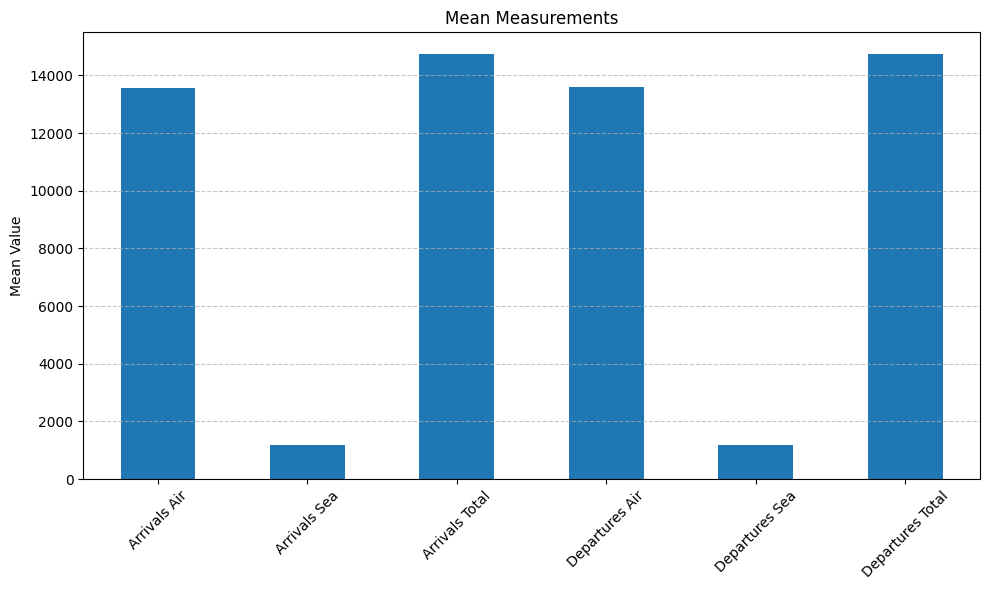

In [37]:
# Plotting the Mean bar plot
mean_df.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Measurements')
#plt.xlabel('')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [38]:
# calculating the median of each column excluding Year, on median() the value come with 2 round decimal's already
median_df = df_pivoted.median().drop(['Year'])

print("\nMedian measurements for each column:")
median_df


Median measurements for each column:


Arrivals Air        13941.70
Arrivals Sea         1311.75
Arrivals Total      15323.55
Departures Air      13979.95
Departures Sea       1299.10
Departures Total    15354.50
dtype: float64

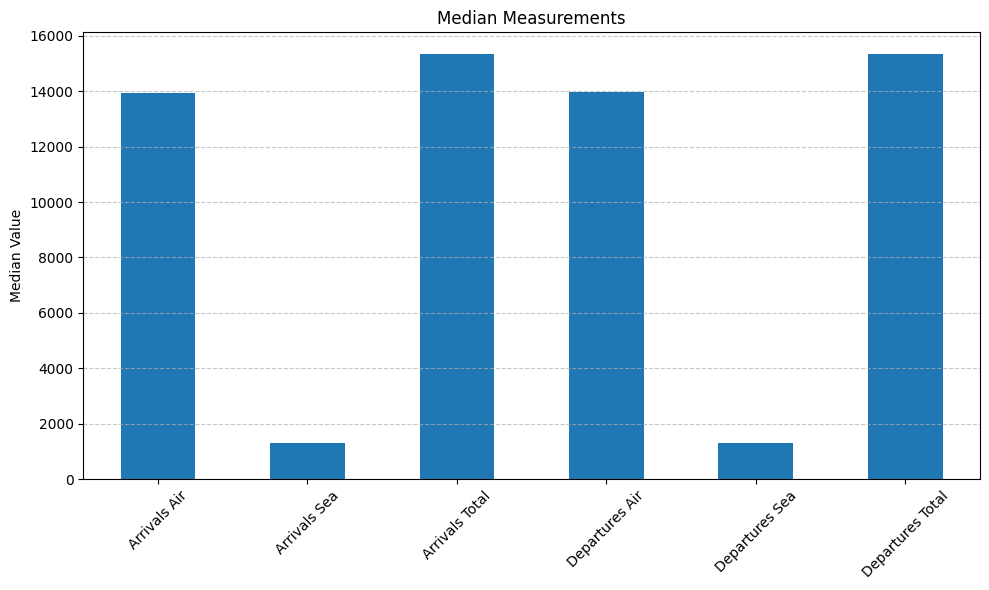

In [39]:
# Plotting the Median bar plot
median_df.plot(kind='bar', figsize=(10, 6))
plt.title('Median Measurements')
#plt.xlabel('')
plt.ylabel('Median Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [40]:
#Calculate Mean Value for each column
mean_df = df_pivoted.mean().drop(['Year'])

print("\nMean value for each column:")
mean_df


Mean value for each column:


Arrivals Air        13547.892857
Arrivals Sea         1176.685714
Arrivals Total      14724.585714
Departures Air      13580.607143
Departures Sea       1172.778571
Departures Total    14753.378571
dtype: float64

In [41]:
df_described_no_year = df_pivoted.drop(columns=['Year']).describe()
df_described_no_year
df_pivoted.describe()

,Year,Arrivals Air,Arrivals Sea,Arrivals Total,Departures Air,Departures Sea,Departures Total
count,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2016.5000,13547.892857,1176.685714,14724.585714,13580.607143,1172.778571,14753.378571
std,4.1833,4771.033748,354.452974,5010.327735,4779.974977,345.456430,5011.889370
min,2010.0000,4135.700000,324.500000,4460.200000,4114.700000,338.000000,4452.600000
25%,2013.2500,11687.300000,1167.500000,13072.775000,11740.250000,1170.150000,13122.675000
50%,2016.5000,13941.700000,1311.750000,15323.550000,13979.950000,1299.100000,15354.500000
75%,2019.7500,16865.100000,1353.000000,18182.700000,16934.575000,1346.250000,18238.625000
max,2023.0000,19481.000000,1501.700000,20625.600000,19476.100000,1494.900000,20626.200000


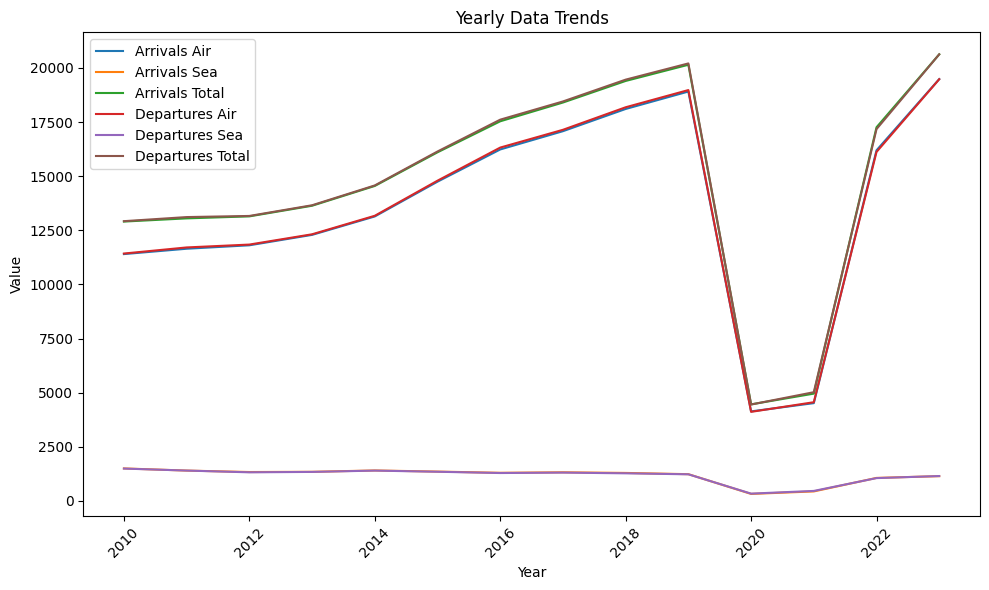

In [42]:
x = df_pivoted['Year']
plt.figure(figsize=(10, 6))  

# Plotting each column against 'Year'
for column in df_pivoted.columns[1:]:  # Excluding 'Year' column for the x-axis
    plt.plot(x, df_pivoted[column], label=column)

# Trends x Patterns x Anomalies
plt.title('Yearly Data Trends')  # Add a title
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('Value')  # Label for the y-axis
plt.legend()  # Show legend to identify lines
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to not cut off elements
plt.show()